In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data = 1000
num_epoch = 10000

# 1000 * 1 벡터 생성
noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
# 1000 * 1 벡터 생성
x = init.uniform_(torch.Tensor(num_data,1), -15, 15)

# 동일, 1000 * 1 벡터 만든것에 +3 먹이고 이걸 y값 
y = (x**2) + 3

# 노이즈 먹인 것.
y_noise = y + noise

In [3]:
# 값 제대로 먹혔는지 확인.

print(y[:5])
print('\n')
print(y_noise[:5])

tensor([[  8.5223],
        [130.5790],
        [  4.0500],
        [182.9384],
        [ 34.4418]])


tensor([[  7.8810],
        [129.3692],
        [  4.8994],
        [184.5229],
        [ 34.9117]])


In [4]:
# 특성개수 임의 생성. Sequential에 다 넣어서.
# 중간에 ReLU는 활성화 함수. 딴것도 맞춰가면서 넣자.
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6, 10),
    nn.ReLU(),
    nn.Linear(10, 6),
    nn.ReLU(),
    nn.Linear(6,1),
)

loss_func = nn.L1Loss() #손실 함수 L1지정
optimizer = optim.SGD(model.parameters(), lr = 0.0002)

In [5]:
loss_array = []

for i in range(num_epoch): # 아까 eopch값 10000 지정해 줬던 것.
    optimizer.zero_grad() ## 매번 들어갈 때 마다, gradient 초기화
    output = model(x)

    loss = loss_func(output, y_noise)
    loss.backward() ## 뒤로 타고 가면서, 파라미터 업데이트 해라.
    optimizer.step()

    loss_array.append(loss.detach().numpy())

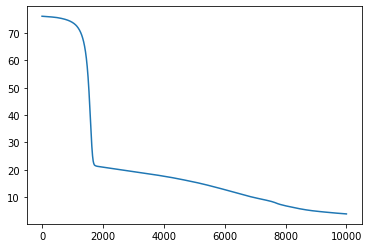

In [7]:
import matplotlib.pyplot as plt

plt.plot(loss_array) 
plt.show() 
## 손실 어떻게 줄어드는지.

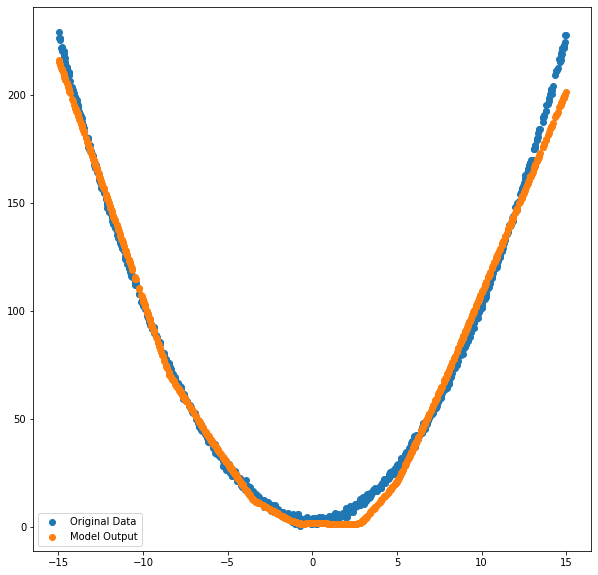

In [8]:
plt.figure(figsize = (10, 10))

plt.scatter(x.detach().numpy(), y_noise, label = 'Original Data')
plt.scatter(x.detach().numpy(), output.detach().numpy(), label = 'Model Output')
plt.legend()
plt.show()

특성 몇개로 구성해야지 loss 최소화 되는지는 많이 해봐야 안다고 한다.
<br>
많이 해보자.